<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Remote%20Sensing/image_classification_dnn_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network Supervised Image Classification with Keras/TensorFlow in R

Zia Amed, University at Buffalo

**Deep neural networks (DNNs)**, also known as neural networks or artificial neural networks, are machine learning models based on the structure and operation of neurons in the human brain. An artificial neural network is a network made up of multiple layers of connected nodes or neurons. Each layer is composed of an input layer, an output layer, and one or more layers of hidden nodes or neurons.

A neural network with many hidden layers (more than one or two) is considered a deep neural network. Deep learning models can automatically learn hierarchical representations of data, making them suitable for complex tasks such as image recognition, natural language processing, and more.

Deep neural networks have been highly successful in various fields, including computer vision, natural language processing, speech recognition, and reinforcement learning. They have revolutionized the field of artificial intelligence and continue to drive advances in machine learning research and applications.

Here are some key characteristics and components of a Deep Neural Network:

1. **Neurons (Nodes):** Neurons are the basic building blocks of a neural network. Each neuron processes information by performing a weighted sum of its inputs, applying an activation function to the sum, and passing the result to the next layer. Neurons in the input layer represent the features of the data, while neurons in the output layer produce the network's predictions.

2. **Layers:** A neural network is organized into layers, which are typically divided into three types:
   - **Input Layer:** This is the first layer that receives the raw input data, such as images, text, or numerical features.
   - **Hidden Layers:** These layers come between the input and output layers and are responsible for learning complex patterns and representations from the input data. Deep neural networks have multiple hidden layers, allowing them to model intricate relationships.
   - **Output Layer:** The final layer produces the network's predictions or output values. The number of neurons in this layer depends on the nature of the task (e.g., regression, classification).

3. **Weights and Biases:** Each connection between neurons has an associated weight and a bias term. These parameters are learned during the training process, allowing the network to adjust its behavior and make accurate predictions.

4. **Activation Functions:** Activation functions introduce non-linearity to the network. Common activation functions include ReLU (Rectified Linear Unit), sigmoid, and tanh. They determine whether a neuron should be activated or not based on its input.

5. **Forward Propagation:** During the forward pass, data flows through the network from the input layer to the output layer. Neurons in each layer compute their weighted sum and apply the activation function to produce their output, which becomes the input for the next layer.

6. **Loss Function:** The loss function quantifies how well the network's predictions match the actual target values (labels) for a given set of inputs. The goal during training is to minimize this loss.

7. **Backpropagation:** Backpropagation is the process of updating the network's weights and biases in the reverse direction, from the output layer back to the input layer. It uses the gradient of the loss function with respect to the network's parameters to adjust them in a way that reduces the loss.

8. **Training:** Neural networks are trained using optimization algorithms like gradient descent. The training process involves iteratively adjusting the weights and biases to minimize the loss function on a labeled dataset.



This tutorial  you will learn how to implement [Deep Neural Network](https://en.wikipedia.org/wiki/Deep_learning) for [pixel based](https://gis.stackexchange.com/questions/237461/distinction-between-pixel-based-and-object-based-classification) [supervised classification ](https://articles.extension.org/pages/40214/whats-the-difference-between-a-supervised-and-unsupervised-image-classification) of [Sentinel-2 multispectral images](https://sentinel.esa.int/web/sentinel/missions/sentinel-2) using [keras](https://keras.rstudio.com/) package in [R](https://cloud.r-project.org/) in Google Colab with GPU support.

[keras](https://keras.rstudio.com/) is a popular Python package for deep neural networks with multiple back ends, including [TensorFlow](https://www.tensorflow.org/), [Microsoft Cognitive Toolkit (CNTK)](https://docs.microsoft.com/en-us/cognitive-toolkit/), and [Theano](http://deeplearning.net/software/theano/). Two R packages allow you  to use Keras from R:  [keras](https://keras.rstudio.com/) and  [kerasR](https://github.com/statsmaths/kerasR).

The **keras** package is able to provide a flexible and feature-rich API and can run both [CPU and GUP version of TensorFlow](https://www.tensorflow.org/install/install_windows) in both Windows and Linux. The default build of TensorFlow will use an NVIDIA® GPU if it is available and the appropriate drivers are installed, and otherwise fallback to using the CPU only.

Note that on all platforms (except macOS) you must be running an NVIDIA® GPU with CUDA® Compute Capability 3.5 or higher. See the list of CUDA-enabled GPU cards. To enable TensorFlow to use a local NVIDIA® GPU, you can install the following:

* [NVIDIA GUP](https://developer.nvidia.com/cuda-gpus): First, you must make sure weather your computer is running with [NVIDIA® GPU](https://developer.nvidia.com/cuda-gpus) or not. Follow the instruction as described  [here](http://nvidia.custhelp.com/app/answers/detail/a_id/2040/~/identifying-the-graphics-card-model-and-device-id-in-a-pc)

* [CUDA Toolkit v11.8](https://developer.nvidia.com/cuda-90-download-archive?target_os=Windows&target_arch=x86_64&target_version=10&target_type=exelocal): If you have an NVIDIA® GPU in your system, you need to download and install [CUDA Toolkit  v9.0](https://developer.nvidia.com/cuda-90-download-archive?target_os=Windows&target_arch=x86_64&target_version=10&target_type=exelocal).

* [cuDNN v8.6](https://developer.nvidia.com/cudnn): The download the zip file version [cuDNN v8.0](https://developer.nvidia.com/cudnn) for your CUDA Toolkit v9.0.You need to extract the zip file and add the location where you extracted it to your system PATH.  Detail installation steps can be found here [here](F:\DeepLearning_tutorial\Satellite_Image_Calssification\h20_R_ImageCalssification\keras_R\Detail installation steps are described here).

Detail installation steps of Keras back-end GPU or CUP version of Tensorflow can be found [here](https://tensorflow.rstudio.com/install/local_gpu).



### Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314929 sha256=13752fca2273d36722f0880672b44e57774503d8e02f4c2df97e440fb7648727
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install Required R Package

In [3]:
%%R
pkg <- c('tidyverse', 'raster', 'rgdal','terra','tidyterra', 'maptools', 'sf', 'classInt',
         'RColorBrewer', 'tmap','tmaptools', 'gridExtra', 'devtools')
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Install tensorflow and Keras

In [ ]:
%%R
remotes::install_github("rstudio/tensorflow", lib='drive/My Drive/R/')

In [ ]:
%%R
install.packages("keras",lib='drive/My Drive/R/' )

UsageError: Cell magic `%%R` not found.


### Load Library

In [ ]:
%%R
.libPaths('drive/My Drive/R')
library (terra)
library (tidyterra)
library(sf)
library(raster)
library(rgdal)
library(luna)
library(geodata)
library(tidyverse)
library(raster)
library(RColorBrewer)
library(RStoolbox)
library(tmap)
library(tmaptools)
library(gridExtra)
library(keras)
library(tensorflow)

### Test
You can test if TensorFlow can use a local GPU by running the following:

In [4]:
%%R
tensorflow::tf_gpu_configured()

TensorFlow built with CUDA:  TRUE 
GPU device name:  [1] FALSE


### Data

In this lesson, we will use a sub-set of Landsat 9 satellite megapixel-based in the central part of the country. We will prepare them for pixel-based classification using machine learning algorithms. The images were already radiometrically and atmospherically corrected.

We will train the a DNN model with four feature classes extracted from Google Earth imagery: (1) Home stage vegetation, (2) cropland, (3) Bare soil/Developed, and (4) water bodies.

In [42]:
%%R
point<-read_csv("/content/drive/MyDrive/Data/DSM_AOI/Image_Classification_Landsat9/Landsat_Subset/AOI_1/point_data.csv")
glimpse(point)

Rows: 20977 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): x, y, B2, B3, B4, B5, B6, B7, dem, Class_ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 20,977
Columns: 10
$ x        <dbl> 173760, 173730, 173700, 171030, 171060, 173850, 173340, 17139…
$ y        <dbl> 2588160, 2588160, 2588160, 2576520, 2576520, 2587860, 2575950…
$ B2       <dbl> 8863, 8791, 8508, 8534, 8835, 8529, 8776, 8562, 8538, 8593, 8…
$ B3       <dbl> 9904, 9758, 9438, 9611, 10018, 9454, 9937, 9668, 9613, 9649, …
$ B4       <dbl> 9637, 9469, 8978, 9084, 9654, 9023, 9558, 9182, 9080, 9121, 9…
$ B5       <dbl> 15364, 15122, 15204, 16093, 13896, 14718, 16498, 16590, 16686…
$ B6       <dbl> 13740, 12743, 12058, 13104, 11553, 12330, 14333, 13784, 13029…
$ B7       <dbl> 11824, 10654, 9851, 10306, 9616, 10017, 11216, 10647, 10293, …
$ dem 

### Create Dataframe

In [43]:
%%R
# training data
point.df<-point[,3:10] %>%
glimpse()

Rows: 20,977
Columns: 8
$ B2       <dbl> 8863, 8791, 8508, 8534, 8835, 8529, 8776, 8562, 8538, 8593, 8…
$ B3       <dbl> 9904, 9758, 9438, 9611, 10018, 9454, 9937, 9668, 9613, 9649, …
$ B4       <dbl> 9637, 9469, 8978, 9084, 9654, 9023, 9558, 9182, 9080, 9121, 9…
$ B5       <dbl> 15364, 15122, 15204, 16093, 13896, 14718, 16498, 16590, 16686…
$ B6       <dbl> 13740, 12743, 12058, 13104, 11553, 12330, 14333, 13784, 13029…
$ B7       <dbl> 11824, 10654, 9851, 10306, 9616, 10017, 11216, 10647, 10293, …
$ dem      <dbl> 12.814396, 12.504545, 12.054958, 13.505932, 12.668021, 13.706…
$ Class_ID <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…


In [7]:
%%R
grid<-read_csv("/content/drive/MyDrive/Data/DSM_AOI/Image_Classification_Landsat9/Landsat_Subset/AOI_1/prediction_grid_data.csv")
glimpse(grid)

Rows: 1000000 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): x, y, ID, B2, B3, B4, B5, B6, B7, dem

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1,000,000
Columns: 10
$ x   <dbl> 150930, 150960, 150990, 151020, 151050, 151080, 151110, 151140, 15…
$ y   <dbl> 2588550, 2588550, 2588550, 2588550, 2588550, 2588550, 2588550, 258…
$ ID  <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,…
$ B2  <dbl> 9289, 9333, 9526, 9635, 9532, 9615, 9646, 9694, 9854, 9894, 9720, …
$ B3  <dbl> 10661, 10657, 10988, 11020, 10766, 10925, 11037, 10975, 11276, 112…
$ B4  <dbl> 10019, 10261, 10927, 11013, 10420, 10522, 10951, 10864, 11087, 112…
$ B5  <dbl> 18168, 17364, 16623, 16162, 16683, 17598, 16579, 16572, 16866, 160…
$ B6  <dbl> 14338, 14709, 15744, 15363, 15173, 15571, 15894, 15761, 16444, 157…
$ B7  <

In [44]:
%%R
grid.df<-grid[c(4:10)] %>%
glimpse()

grid.xy<-grid[c(3,1:2)]

Rows: 1,000,000
Columns: 7
$ B2  <dbl> 9289, 9333, 9526, 9635, 9532, 9615, 9646, 9694, 9854, 9894, 9720, …
$ B3  <dbl> 10661, 10657, 10988, 11020, 10766, 10925, 11037, 10975, 11276, 112…
$ B4  <dbl> 10019, 10261, 10927, 11013, 10420, 10522, 10951, 10864, 11087, 112…
$ B5  <dbl> 18168, 17364, 16623, 16162, 16683, 17598, 16579, 16572, 16866, 160…
$ B6  <dbl> 14338, 14709, 15744, 15363, 15173, 15571, 15894, 15761, 16444, 157…
$ B7  <dbl> 11357, 11819, 13262, 12782, 12286, 12710, 13399, 12748, 14141, 137…
$ dem <dbl> 9.827662, 14.767797, 2.985770, 2.595814, 2.571604, 8.822142, 3.505…


### Convert data as matrix

In [45]:
%%R
point.df<- as.matrix(point.df)
grid.df <- as.matrix(grid.df)

### Set  `dimnames` to `NULL`:

In [46]:
%%R
dimnames(point.df) <- NULL
dimnames(grid.df) <- NULL

In [47]:
%%R
head(point.df)


     [,1]  [,2] [,3]  [,4]  [,5]  [,6]     [,7] [,8]
[1,] 8863  9904 9637 15364 13740 11824 12.81440    0
[2,] 8791  9758 9469 15122 12743 10654 12.50455    0
[3,] 8508  9438 8978 15204 12058  9851 12.05496    0
[4,] 8534  9611 9084 16093 13104 10306 13.50593    0
[5,] 8835 10018 9654 13896 11553  9616 12.66802    0
[6,] 8529  9454 9023 14718 12330 10017 13.70659    0


### Standardize_the data: ((x-mean(x))/sd(x))

In [48]:
%%R
point.df[, 1:7] = scale(point.df[, 1:7])
grid.df[, 1:7] = scale(grid.df[, 1:7])

#### Split data  training and test

In [49]:
%%R
##  Determine sample size
ind <- sample(2, nrow(point.df), replace=TRUE, prob=c(0.80, 0.20))
# Split the `Split data
training <- point.df[ind==1, 1:7]
test <- point.df[ind==2, 1:7]
# Split the class attribute
trainingtarget <- point.df[ind==1, 8]
testtarget <- point.df[ind==2, 8]


### Hyperparameter flag

In [62]:
%%R
FLAGS <- flags(
  flag_numeric('dropout_1', 0.2, 'First dropout'),
  flag_numeric('dropout_2', 0.2, 'Second dropout'),
  flag_numeric('dropout_3', 0.1, 'Third dropout'),
  flag_numeric('dropout_4', 0.1, 'Forth dropout')
  )

### Define model parameters with 4 hidden layers with 100 neurons

In [65]:
%%R
model <- keras_model_sequential()
model %>%
  # Imput layer
  layer_dense(units = 200, activation = 'relu',
              kernel_regularizer =regularizer_l1_l2(l1 = 0.00001, l2 = 0.00001),input_shape = c(7)) %>%
  layer_dropout(rate = FLAGS$dropout_1,seed = 1) %>%
  # Hidden layers
  layer_dense(units = 200, activation = 'relu',
              kernel_regularizer = regularizer_l1_l2(l1 = 0.00001, l2 = 0.00001)) %>%
  layer_dropout(rate = FLAGS$dropout_2,seed = 1) %>%
  layer_dense(units = 200, activation = 'relu',
              kernel_regularizer = regularizer_l1_l2(l1 = 0.00001, l2 = 0.00001)) %>%
  layer_dropout(rate = FLAGS$dropout_3,seed = 1) %>%
  layer_dense(units = 200, activation = 'relu',
              kernel_regularizer = regularizer_l1_l2(l1 = 0.0001, l2 = 0.00001)) %>%
  layer_dropout(rate = FLAGS$dropout_4) %>%
  # Output layer
  layer_dense(units = 4, activation = 'softmax')



In [66]:
%%R
summary(model)

Model: "sequential_7"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_33 (Dense)                   (None, 200)                     1600        
 dropout_25 (Dropout)               (None, 200)                     0           
 dense_32 (Dense)                   (None, 200)                     40200       
 dropout_24 (Dropout)               (None, 200)                     0           
 dense_31 (Dense)                   (None, 200)                     40200       
 dropout_23 (Dropout)               (None, 200)                     0           
 dense_30 (Dense)                   (None, 200)                     40200       
 dropout_22 (Dropout)               (None, 200)                     0           
 dense_29 (Dense)                   (None, 4)                       804         
Total params: 123004 (480.48 KB)
Trainable params: 123004 (480.48 KB)
Non-trainable par

### Define an optimizer (Stochastic gradient descent optimizer)

In [114]:
%%R
optimizer <- optimizer_sgd(learning_rate=0.01)

### Compile the model:

In [68]:
%%R
model %>% compile(
  loss = 'sparse_categorical_crossentropy',
  optimizer = optimizer,
  metrics = 'accuracy'
)


### Fit the model to the data

In [ ]:
%%R
history<-model %>% fit(
  training, trainingtarget,
  epochs = 50,
  batch_size = 100,
  shuffle = TRUE,
  validation_split = 0.2
  )

#### Plot history

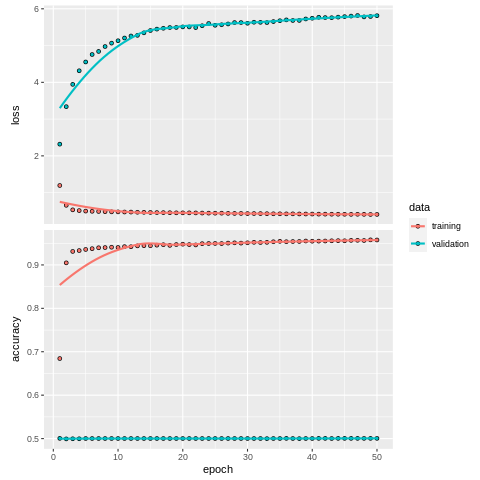

In [70]:
%%R
plot(history)

### Evaluate the model

In [71]:
%%R
score <- model %>% evaluate(test, testtarget, batch_size = 100)
cat('Test loss:', score[[1]], '\n')
cat('Test accuracy:', score[[2]], '\n')

42/42 [==============================] - 0s 3ms/step - loss: 1.4316 - accuracy: 0.8718
Test loss: 1.431639 
Test accuracy: 0.8718317 


### Prediction & confusion matrix - test data

In [72]:
%%R
class_test <- model %>% predict(test) %>%
              k_argmax()


131/131 [==============================] - 0s 2ms/step


In [73]:
%%R
 test_pred<-as.matrix(class_test)

In [74]:
%%R
table(testtarget,test_pred)

          test_pred
testtarget    0    1
         0  930  124
         1   19 2716
         2   25   71
         3  113  184


### Prediction at grid locations:

In [75]:
%%R
class_grid <- model %>% predict(grid.df) %>%
              k_argmax()

31250/31250 [==============================] - 63s 2ms/step


In [113]:
%%R
class_grid

tf.Tensor([1 1 1 ... 1 1 1], shape=(1000000), dtype=int64)


In [82]:
%%R
class<-as.matrix(class_grid)
new.grid<-cbind(x=grid.xy$x, y=grid.xy$y,Class_ID=class )
colnames(new.grid)[3]<-"Class_ID"
new.grid.na<-as.data.fram(na.omit(new.grid))



          x       y Class_ID
[1,] 150930 2588550        1
[2,] 150960 2588550        1
[3,] 150990 2588550        1
[4,] 151020 2588550        1
[5,] 151050 2588550        1
[6,] 151080 2588550        1


In [112]:
%%R
levels(as.factor(new.grid.na$Class_ID))

[1] "0" "1"


In [84]:
%%R
ID<-read_csv("/content/drive/MyDrive/Data/DSM_AOI/Image_Classification_Landsat9/Landsat_Subset/AOI_1/landuse_id.csv")
ID

Rows: 4 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Class, Description
dbl (1): Class_ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 4 × 3
  Class_ID Class   Description         
     <dbl> <chr>   <chr>               
1        0 Class_1 Homestead vegetation
2        2 Class_2 Cropland            
3        3 Class_3 Bare soil/Developed 
4        4 Class_4 Water body          


### Convert to raster

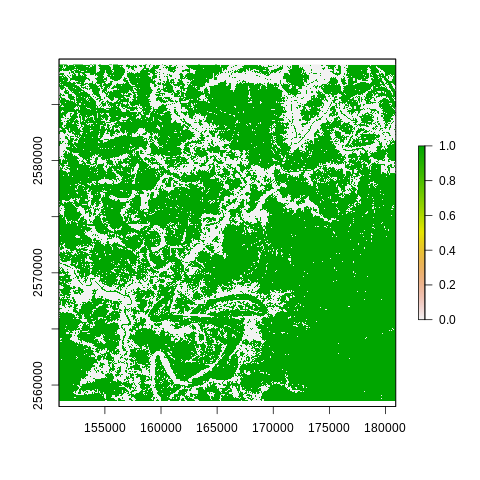

In [91]:
%%R
x<-as.data.frame(new.grid.na)
head(x)
#x<-SpatialPointsDataFrame(new.grid.na[, c("x", "y")], data = new.grid.na)
r <- rasterFromXYZ(as.data.frame(x)[, c("x", "y", "Class_ID")])


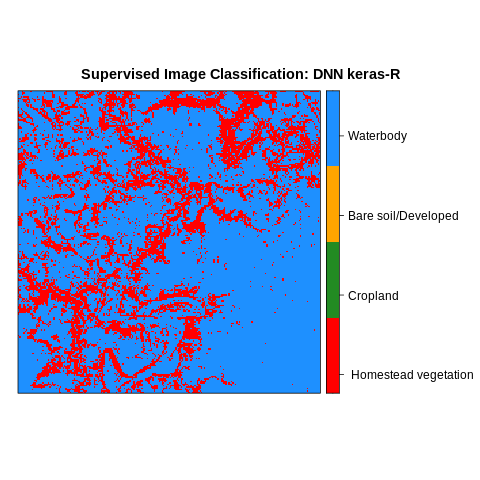

In [103]:
%%R
# Create color palette
myPalette <- colorRampPalette(c("red","forestgreen","orange", "dodgerblue"))
# Plot Map
LU<-spplot(r,"Class_ID", main="Supervised Image Classification: DNN keras-R" ,
      colorkey = list(space="right",tick.number=1,height=1, width=1.5,
              labels = list(at = seq(0,0.9,length=4),cex=1.0,
              lab = c(" Homestead vegetation" ,"Cropland", "Bare soil/Developed ", "Waterbody"))),
              col.regions=myPalette,cut=3)
LU